# Project Name - Multiclass Fish Image Classification

### Project type - Deep learning --> Image classification
### Name - Nilesh Bahirgaonkar 

# Project Summary

- This project focuses on classifying fish images into multiple categories using deep learning models.
- The dataset is preprocessed with normalization, resizing them tp 224 x 224. Specific models like InceptionV3 required pixel size of 299 x 299.
- Data Augmentation to improve generalization and performance.
- A custom CNN is built, trained, evaluated and achieved and accuracy of 86%.
- Followed with a transfer learning using a 5 pretrained models (MobileNetV2, DenseNet121, VGG16, ResNet50, InceptionV3), achieved better performance.
- Evaluation metrics like accuracy,precision,recall,F1 score has been calculated using classification report.
- The models(.h5) and training history(.pkl) was saved for future improvement.

# Github Link 

https://github.com/03nilb-spec/fish-classification-streamlit

# Problem Statement

This project aims to classify fish images into multiple categories using deep learning techniques. The approach involves training convolutional neural networks (CNNs) from scratch and leveraging transfer learning with pre-trained architectures to improve accuracy and reduce training time. The workflow includes saving trained models for reuse and deploying a Streamlit-based web application that predicts fish species from user-uploaded images.

# Loading Data, Data Preprocessing, Data Augmentation  

### Checking that the data is added 

In [1]:
import os

In [2]:
print(os.listdir('./'))

['.ipynb_checkpoints', 'fish_cnn_v1.h5', 'fish_dense.h5', 'Fish_image_classification.ipynb', 'fish_inception.h5', 'fish_Mobile_net_V2.h5', 'fish_res.h5', 'fish_restnet.h5', 'fish_vgg.h5', 'test', 'train', 'val']


### Load the data 

In [3]:
# Here i am using Image Generator, for loading the data, for resizing and for data augmentation  

### Import Libraries 

In [4]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [5]:
# Set directory
base_dir = './'

In [6]:
# Set pixel size and batch size 
img_height, img_width = 224,224
batch_size = 32

In [7]:
# load data, rescale data and data augmentation 
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
train_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              brightness_range=(0.8,1.2),
                              zoom_range=0.2,
                              horizontal_flip=True)             # data augmentation 

# Loading data from directory
test_generator = test_gen.flow_from_directory(
    base_dir + 'test',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_gen.flow_from_directory(
    base_dir + 'val',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

train_generator = train_gen.flow_from_directory(
    base_dir + 'train',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True
)

Found 3188 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.


# Understand the data

### Number of categories

In [8]:
print('Total Categories : ',train_generator.num_classes)

Total Categories :  11


### Categories Names and their corresponding labels

In [9]:
label_list = list(train_generator.class_indices.items())
label_list

[('animal fish', 0),
 ('animal fish bass', 1),
 ('fish sea_food black_sea_sprat', 2),
 ('fish sea_food gilt_head_bream', 3),
 ('fish sea_food hourse_mackerel', 4),
 ('fish sea_food red_mullet', 5),
 ('fish sea_food red_sea_bream', 6),
 ('fish sea_food sea_bass', 7),
 ('fish sea_food shrimp', 8),
 ('fish sea_food striped_red_mullet', 9),
 ('fish sea_food trout', 10)]

### Total Samples 

In [10]:
print('Test Samples :',test_generator.samples)
print('Train Samples :',train_generator.samples)
print('Validation Samples :',val_generator.samples)

Test Samples : 3188
Train Samples : 6225
Validation Samples : 1092


In [11]:
# So there are total 11 categories
# each category is labelled
# there are 3188 sample images in test, 6225 images in train, 1092 in validation 

# Model Training 

## Custom ***CNN*** 

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes,activation='softmax')
])

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the model 

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,110,475 (19.49 MB)

 Trainable params: 5,109,515 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

### Training the model 

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.2666 - loss: 3.0320 - val_accuracy: 0.1712 - val_loss: 11.7643
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.3402 - loss: 1.9472 - val_accuracy: 0.3892 - val_loss: 1.7229
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.4081 - loss: 1.6040 - val_accuracy: 0.4799 - val_loss: 1.3163
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.4722 - loss: 1.3954 - val_accuracy: 0.3205 - val_loss: 2.6705
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.5204 - loss: 1.2290 - val_accuracy: 0.6026 - val_loss: 1.0320
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.5660 - loss: 1.1274 - val_accuracy: 0.5623 - val_loss: 1.2152
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.6213 - loss: 1.0393 - val_accuracy: 0.7262 - val_loss: 0.9858
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.6504 - loss: 0.9777 - val_acc

In [16]:
from sklearn.metrics import classification_report

In [17]:


# Predict
Y_pred = model.predict(test_generator)
y_pred = Y_pred.argmax(axis=1)

# True labels
y_true = test_generator.classes

# Class labels (names)
label_list = list(test_generator.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred, target_names=label_list))


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       521
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.85      0.94      0.90       298
   fish sea_food gilt_head_bream       0.69      0.60      0.64       305
   fish sea_food hourse_mackerel       0.85      0.97      0.90       286
        fish sea_food red_mullet       0.92      1.00      0.96       291
     fish sea_food red_sea_bream       0.98      0.54      0.70       273
          fish sea_food sea_bass       0.70      0.86      0.78       327
            fish sea_food shrimp       0.87      0.97      0.92       289
fish sea_food striped_red_mullet       0.84      0.72      0.77       293
             fish sea_food trout       0.91      0.93      0.92       292

                        accuracy                           0.86   

C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
model.save("fish_cnn_v2.h5")

In [19]:
import pickle

# Save history object
with open('history_model_cnn.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Transfer Learning 

## ***MobileNetV2***

### Importing libraries and models

In [20]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

In [21]:
# loading the base model
base_model = MobileNetV2(
    input_shape=(img_height,img_width,3),
    include_top=False,
    weights='imagenet'
)

### Freezing the pre-trained model

In [22]:
base_model.trainable = False

In [23]:
# Since MobileNetV2 doesn’t know about Fish classification images, we need to add our own dense layers to predict the 11 categories.

In [24]:
model_Mobile = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes,activation='softmax')
])

### Compiling the model

In [25]:
model_Mobile.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model 

In [26]:
history_Mobile = model_Mobile.fit(train_generator,
                                 validation_data=val_generator,
                                 epochs=20)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 192s 942ms/step - accuracy: 0.6928 - loss: 0.9542 - val_accuracy: 0.9725 - val_loss: 0.1072
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 684ms/step - accuracy: 0.9532 - loss: 0.1560 - val_accuracy: 0.9679 - val_loss: 0.0885
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 677ms/step - accuracy: 0.9708 - loss: 0.0989 - val_accuracy: 0.9881 - val_loss: 0.0470
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 675ms/step - accuracy: 0.9745 - loss: 0.0704 - val_accuracy: 0.9853 - val_loss: 0.0507
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 673ms/step - accuracy: 0.9755 - loss: 0.0751 - val_accuracy: 0.9899 - val_loss: 0.0360
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 673ms/step - accuracy: 0.9758 - loss: 0.0690 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 676ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9918 - val_loss: 0.0340
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.9857 - lo

In [27]:
# Evaluate 
pred_mobile = model_Mobile.predict(test_generator)     # get predictions 

100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 441ms/step


In [28]:
pred_mobile_class = pred_mobile.argmax(axis=1)      # get class indices 

In [29]:
print(classification_report(y_true,pred_mobile_class,target_names=label_list))

                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      0.99       521
                animal fish bass       1.00      0.54      0.70        13
   fish sea_food black_sea_sprat       1.00      0.99      1.00       298
   fish sea_food gilt_head_bream       0.99      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      0.99      1.00       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      1.00      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.99      3188
                       macro avg    

### Saving the model

In [30]:
model_Mobile.save('fish_Mobile_net_V2_1.h5')

In [31]:
import pickle
 
with open('history_model_mobile.pkl', 'wb') as f:
    pickle.dump(history_Mobile.history, f)

## ***VGG16***

### Importing Libraries 

In [32]:
from tensorflow.keras.applications import VGG16

In [33]:
# Loading the base model 
base_model_vgg16 = VGG16(
    input_shape=(img_height,img_width,3),
    include_top=False,
    weights='imagenet'
)

### Freezing the pre-trained model 

In [34]:
base_model_vgg16.trainable = False

In [35]:
# Since VGG16 doesn’t know about Fish classification images, we need to add our own dense layers to predict the 11 categories.

In [36]:
model_vgg = Sequential([ 
    base_model_vgg16,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.30),
    Dense(train_generator.num_classes,activation='softmax')
])

### Compiling the model 

In [37]:
model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model 

In [38]:
# Using early_stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=3,
                          restore_best_weights=True)

history_vgg = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=early_stop
)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.3228 - loss: 1.9859 - val_accuracy: 0.7152 - val_loss: 1.1447
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.6729 - loss: 1.1056 - val_accuracy: 0.7995 - val_loss: 0.7302
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.7738 - loss: 0.7689 - val_accuracy: 0.8745 - val_loss: 0.5139
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 830s 4s/step - accuracy: 0.8286 - loss: 0.5880 - val_accuracy: 0.8791 - val_loss: 0.4167
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 832s 4s/step - accuracy: 0.8499 - loss: 0.5019 - val_accuracy: 0.9194 - val_loss: 0.3475
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.8740 - loss: 0.4201 - val_accuracy: 0.9103 - val_loss: 0.3126
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 828s 4s/step - accuracy: 0.8877 - loss: 0.3774 - val_accuracy: 0.9414 - val_loss: 0.2499
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 831s 4s/step - accuracy: 0.8948 - loss: 0.3444 - val_accu

In [39]:
# Evaluate 
pred_vgg = model_vgg.predict(test_generator)

100/100 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step


In [40]:
pred_vgg_class = pred_vgg.argmax(axis=1)

In [41]:
print(classification_report(y_true,pred_vgg_class,target_names=label_list))

                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       521
                animal fish bass       1.00      0.08      0.14        13
   fish sea_food black_sea_sprat       0.97      1.00      0.98       298
   fish sea_food gilt_head_bream       0.94      1.00      0.97       305
   fish sea_food hourse_mackerel       1.00      0.97      0.98       286
        fish sea_food red_mullet       0.97      0.95      0.96       291
     fish sea_food red_sea_bream       1.00      0.94      0.97       273
          fish sea_food sea_bass       0.99      0.99      0.99       327
            fish sea_food shrimp       0.95      1.00      0.97       289
fish sea_food striped_red_mullet       0.94      0.91      0.93       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.97      3188
                       macro avg    

In [42]:
model_vgg.save('fish_vgg_1.h5')

In [43]:
import pickle

with open('history_model_vgg.pkl', 'wb') as f:
    pickle.dump(history_vgg.history, f)

## ***ResNet50***

### Importing Libraries 

In [44]:
from tensorflow.keras.applications import ResNet50

In [45]:
# Loading base model 
base_model_res = ResNet50(include_top=False,
                         input_shape=(img_height,img_width,3),
                         weights='imagenet')

### Freezing the pre-trained model 

In [46]:
base_model_res.trainable=False

### Building the model 

In [47]:
model_res = Sequential([
    base_model_res,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes,activation='softmax')
])

### Compiling the model 

In [48]:
model_res.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

### Training the model 

In [49]:
history_res = model_res.fit(train_generator,
                           validation_data=val_generator,
                           epochs=20,
                           callbacks=early_stop)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.1517 - loss: 2.3603 - val_accuracy: 0.1877 - val_loss: 2.2164
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.1835 - loss: 2.2266 - val_accuracy: 0.2463 - val_loss: 2.1295
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2020 - loss: 2.1628 - val_accuracy: 0.2253 - val_loss: 2.0821
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2174 - loss: 2.1246 - val_accuracy: 0.3342 - val_loss: 2.0254
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2379 - loss: 2.0869 - val_accuracy: 0.2866 - val_loss: 1.9903
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2453 - loss: 2.0742 - val_accuracy: 0.3178 - val_loss: 1.9795
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.2513 - loss: 2.0588 - val_accuracy: 0.3269 - val_loss: 1.9289
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2611 - loss: 2.0368 - val_accu

In [50]:
model_res.save('fish_res_1.h5')

In [51]:
pred_res = model_res.predict(test_generator)

100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step


In [52]:
pred_res_class = pred_res.argmax(axis=1)
y_true = test_generator.classes
label_list = list(test_generator.class_indices.keys())

In [53]:
print(classification_report(y_true,pred_res_class, target_names=label_list))

                                  precision    recall  f1-score   support

                     animal fish       0.57      0.80      0.67       521
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.41      0.14      0.21       298
   fish sea_food gilt_head_bream       0.17      0.00      0.01       305
   fish sea_food hourse_mackerel       0.27      0.64      0.38       286
        fish sea_food red_mullet       0.48      0.31      0.37       291
     fish sea_food red_sea_bream       0.42      0.47      0.45       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.51      0.66      0.57       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.28      0.77      0.41       292

                        accuracy                           0.40      3188
                       macro avg    

C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Fine Tuning the model 

### Unfreezing the first few layers of the pre-trained model 

In [54]:
base_model_res.trainable= True

In [55]:
for i in base_model_res.layers[:30]:
    i.trainable = False

In [56]:
model_res.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [57]:
history_res = model_res.fit(train_generator,
                           validation_data=val_generator,
                           epochs=20,
                           callbacks=early_stop)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 809s 4s/step - accuracy: 0.1838 - loss: 5.3127 - val_accuracy: 0.0916 - val_loss: 2.6425
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.2665 - loss: 1.9938 - val_accuracy: 0.1081 - val_loss: 6.4247
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 796s 4s/step - accuracy: 0.3904 - loss: 1.5828 - val_accuracy: 0.3086 - val_loss: 5.5331
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 794s 4s/step - accuracy: 0.5002 - loss: 1.3197 - val_accuracy: 0.1712 - val_loss: 41.0977


In [60]:
pred_res = model_res.predict(test_generator)
pred_res_class = pred_res.argmax(axis=1)
y_true = test_generator.classes
label_list = list(test_generator.class_indices.keys())

100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step


In [61]:
print(classification_report(y_true,pred_res_class, target_names=label_list))

                                  precision    recall  f1-score   support

                     animal fish       0.00      0.00      0.00       521
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.08      0.89      0.15       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.30      0.11      0.16       292

                        accuracy                           0.09      3188
                       macro avg    

C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
model_res.save('fish_restnet_1.h5')

In [63]:
import pickle

with open('history_model_res.pkl', 'wb') as f:
    pickle.dump(history_res.history, f)

## ***DenseNet121***

### Importing libraries 

In [64]:
from tensorflow.keras.applications import DenseNet121

### Loading the base model 

In [65]:
base_model_Dense = DenseNet121(weights='imagenet',
                              input_shape=(img_height,img_width,3),
                              include_top=False)

### Freezing the pre-trained model 

In [66]:
base_model_Dense.trainable = False

In [67]:
# Adding custom layer
model_dense = Sequential([
    base_model_Dense,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes,activation='softmax')
])

### Compiling the model 

In [68]:
model_dense.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

### Training the model 

In [69]:
history_dense = model_dense.fit(train_generator,
                               epochs=20,
                               validation_data=val_generator,callbacks= early_stop
                               )

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.6271 - loss: 1.2086 - val_accuracy: 0.9780 - val_loss: 0.1323
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.9394 - loss: 0.2183 - val_accuracy: 0.9799 - val_loss: 0.0697
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.9709 - loss: 0.1086 - val_accuracy: 0.9844 - val_loss: 0.0484
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9703 - loss: 0.0976 - val_accuracy: 0.9844 - val_loss: 0.0392
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9774 - loss: 0.0757 - val_accuracy: 0.9936 - val_loss: 0.0304
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9788 - loss: 0.0656 - val_accuracy: 0.9936 - val_loss: 0.0237
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9842 - loss: 0.0544 - val_accuracy: 0.9899 - val_loss: 0.0310
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9794 - loss: 0.0586 - val_accu

In [70]:
pred_dense = model_dense.predict(test_generator)
pred_dense_class = pred_dense.argmax(axis=1)
y_true = test_generator.classes
label_list = list(test_generator.class_indices.keys())

100/100 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step


In [71]:
print(classification_report(y_true,pred_dense_class, target_names=label_list))

                                  precision    recall  f1-score   support

                     animal fish       0.99      0.99      0.99       521
                animal fish bass       0.77      0.77      0.77        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      0.99      0.99       305
   fish sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.99      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00      3188
                       macro avg    

In [72]:
model_dense.save('fish_dense_1.h5')

In [73]:
import pickle

with open('history_model_dense.pkl', 'wb') as f:
    pickle.dump(history_dense.history, f)

## ***InceptionV3***

### Importing Libraries 

In [74]:
from tensorflow.keras.applications import InceptionV3

### Defining generators for InceptionV3

In [75]:
# As it works efficiently with target size of 299,299, so we will create a generator for InceptionV3 with this size.

In [76]:
train_generator_inc = train_gen.flow_from_directory(
    base_dir + 'train',
    target_size=(299,299),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator_inc = val_gen.flow_from_directory(
    base_dir + 'val',
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

test_generator_inc = test_gen.flow_from_directory(
    base_dir + 'test',
    target_size=(299,299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3188 images belonging to 11 classes.


### loading the base model 

In [77]:
base_model_inc = InceptionV3(include_top=False,
                            input_shape=(299,299,3),
                            weights='imagenet')

### Freezing the pre-trained model

In [78]:
base_model_inc.trainable = False

In [79]:
# Adding custom layer
model_inc = Sequential([
    base_model_inc,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(train_generator_inc.num_classes,activation='softmax')
])

### Compiling the model 

In [80]:
model_inc.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

### Training the model 

In [81]:
history_inc = model_inc.fit(train_generator_inc,
                           validation_data=val_generator_inc,
                           epochs=20,
                           callbacks=early_stop)

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.6173 - loss: 1.1587 - val_accuracy: 0.9377 - val_loss: 0.2307
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.9229 - loss: 0.2611 - val_accuracy: 0.9698 - val_loss: 0.1176
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.9506 - loss: 0.1727 - val_accuracy: 0.9689 - val_loss: 0.1095
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.9504 - loss: 0.1434 - val_accuracy: 0.9799 - val_loss: 0.0721
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.9710 - loss: 0.0979 - val_accuracy: 0.9863 - val_loss: 0.0528
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.9687 - loss: 0.0923 - val_accuracy: 0.9890 - val_loss: 0.0409
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.9777 - loss: 0.0755 - val_accuracy: 0.9853 - val_loss: 0.0457
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.9712 - loss: 0.0796 - val_accu

In [82]:
pred_inc = model_inc.predict(test_generator_inc)

100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step


In [83]:
pred_inc_class = pred_inc.argmax(axis=1)
y_true_inc = test_generator_inc.classes
label_list_inc = list(test_generator_inc.class_indices.keys())

In [84]:
print(classification_report(y_true_inc,pred_inc_class,target_names=label_list_inc))

                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      0.99       521
                animal fish bass       1.00      0.69      0.82        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       0.99      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      0.99      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00      3188
                       macro avg    

In [85]:
model_inc.save('fish_inception_1.h5')

In [86]:
import pickle

with open('history_model_inc.pkl', 'wb') as f:
    pickle.dump(history_inc.history, f)

# Model Evaluation and Visualization 

## Model Evaluation for Custom CNN 

|Metrics|||||
|-|-|-|-|-|
|accuracy|  ||                       0.86|      3188|
|macro avg|       0.78|      0.77|      0.77|      3188|
|weighted avg|       0.86|      0.86|      0.85|      3188|


|Category|precision|recall|f1-score|support|
|-|-|-|-|-|
|animal fish |      0.97  |    0.99   |   0.98   |    521|
|animal fish bass|       0.00|      0.00|      0.00|        13|
|fish sea_food black_sea_sprat|       0.85|      0.94|      0.90|       298|
|fish sea_food gilt_head_bream|       0.69|      0.60|      0.64|       305|
|fish sea_food hourse_mackerel|       0.85|      0.97|      0.90|       286|
|fish sea_food red_mullet|       0.92|      1.00|      0.96|       291|
|fish sea_food red_sea_bream|       0.98|      0.54|      0.70|       273|
|fish sea_food sea_bass|       0.70|      0.86|      0.78|       327|
|fish sea_food shrimp|       0.87|      0.97|      0.92|       289|
|fish sea_food striped_red_mullet|       0.84|      0.72|      0.77|       293|
|fish sea_food trout|       0.91|      0.93|      0.92|       292|

In [88]:
# As we that, it has a very good Accuracy of 86% and has a very nice precision score for almost every class. 
# Also we that, the model fails to predict the classes like 'animal fish bass'. 

### Visualizing Accuracy and Loss for Custom CNN

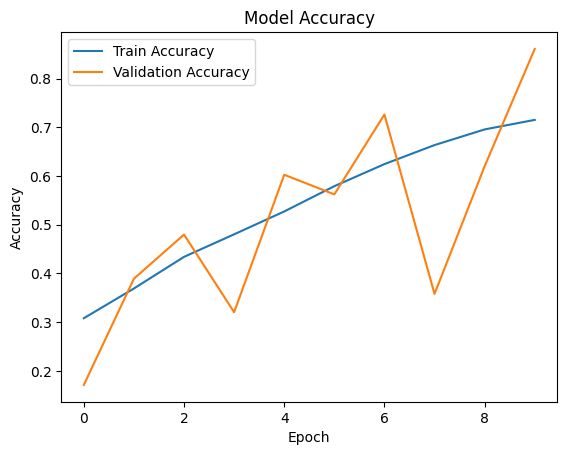

In [89]:
# Accuracy Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

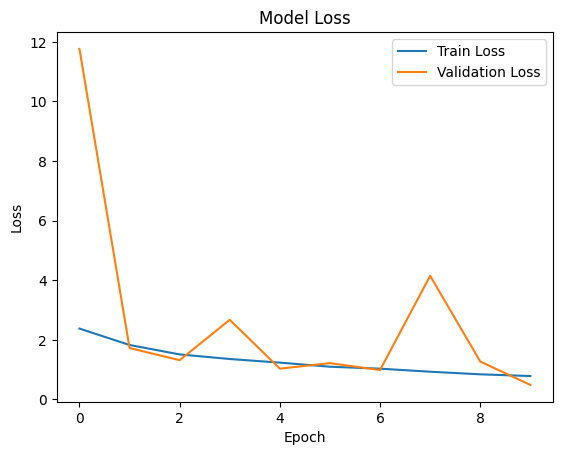

In [91]:
# Loss Plot 
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model evaluation for MobileNetV2

|Metrics|||||
|-|-|-|-|-|
|accuracy|  ||                         0.99 |     3188|
|macro avg|       1.00    |  0.95     | 0.97     | 3188|
|weighted avg|       0.99  |    0.99  |    0.99   |   3188|

|Category|precision|recall|f1-score|support|
|-|-|-|-|-|
|animal fish|       0.99|      1.00|      0.99|       521|
|animal fish bass|       1.00|      0.54|      0.70|        13|
|fish sea_food black_sea_sprat|       1.00|      0.99|      1.00|       298|
|fish sea_food gilt_head_bream|       0.99|      1.00|      1.00|       305|
|fish sea_food hourse_mackerel|       1.00|      0.99|      1.00|       286|
|fish sea_food red_mullet|       1.00|      0.98|      0.99|       291|
|fish sea_food red_sea_bream|       1.00|      1.00|      1.00|       273|
|fish sea_food sea_bass|       0.99|      1.00|      1.00|       327|
|fish sea_food shrimp|       1.00|      1.00|      1.00|       289|
|fish sea_food striped_red_mullet|       0.98|      1.00|      0.99|       293|
|fish sea_food trout|       1.00|      1.00|      1.00|       292|

In [98]:
# The Model is performing excellently, we saw that in previous custom CNN, it failed to predict for 'animal fish bass'.
# But, using pre-trained model MobileNetV2, it is predicting 'animal fish bass' too with 100% precision.
# The model is so perfect that it has an accuracy of 99% and has an overall good metrics like precision,recall,f1 for every class.
# it is almost predicting every class with high precision and accurate.

### Visualizing Accuracy and loss for MobileNetV2

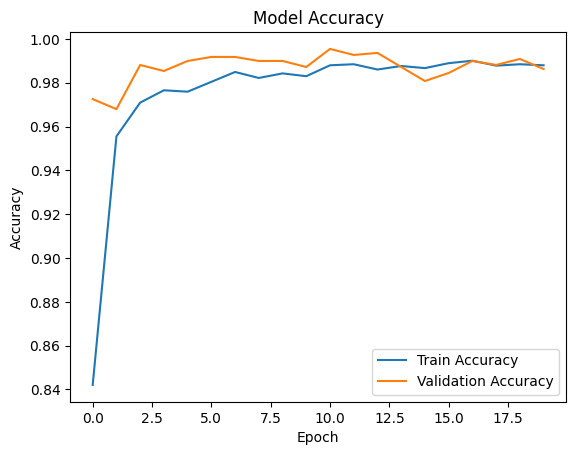

In [92]:
# Accuracy Plot
plt.plot(history_Mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_Mobile.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

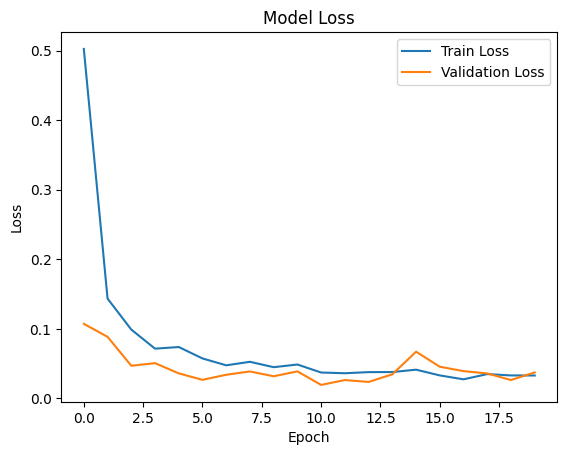

In [93]:
# Loss Plot
plt.plot(history_Mobile.history['loss'], label='Train Loss')
plt.plot(history_Mobile.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model evaluation for VGG16

|Metrics|||||
|-|-|-|-|-|
|accuracy ||  | 0.97  |    3188|
|macro avg |      0.98 |     0.89   |   0.90  |    3188|
|weighted avg   |    0.97     | 0.97     | 0.97  |    3188|

|Category|precision|    recall|  f1-score|   support|
|-|-|-|-|-|
|animal fish|       0.98 |     0.99  |    0.99  |     521|
|animal fish bass |      1.00   |   0.08 |     0.14  |      13|
|fish sea_food black_sea_sprat|       0.97  |    1.00     | 0.98 |      298|
|fish sea_food gilt_head_bream |      0.94   |   1.00 |     0.97  |     305|
|fish sea_food hourse_mackerel |      1.00 |     0.97  |    0.98  |     286|
|fish sea_food red_mullet   |    0.97 |     0.95 |     0.96  |     291|
|fish sea_food red_sea_bream |      1.00  |    0.94     | 0.97  |     273|
|fish sea_food sea_bass |      0.99     | 0.99    |  0.99 |      327|
|fish sea_food shrimp   |    0.95   |   1.00    |  0.97       |289|
|fish sea_food striped_red_mullet  |     0.94     | 0.91   |   0.93  |     293|
|fish sea_food trout   |    1.00 |     1.00    |  1.00      | 292|

In [101]:
# this model also got good and excellent performance with an accuracy of 97%.
# But, it got a less recall, and f1 score for 'animal fish bass', got high precision of 100%.
# For other classes it is predicting good and has very good performance for other classes.

### Visualizing Accuracy and Loss for VGG16

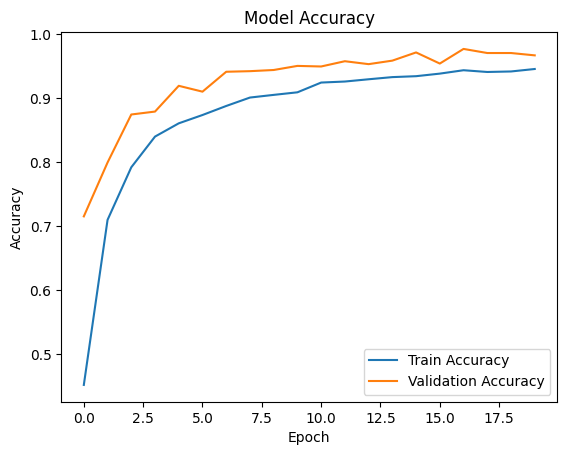

In [94]:
# Accuracy Plot
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

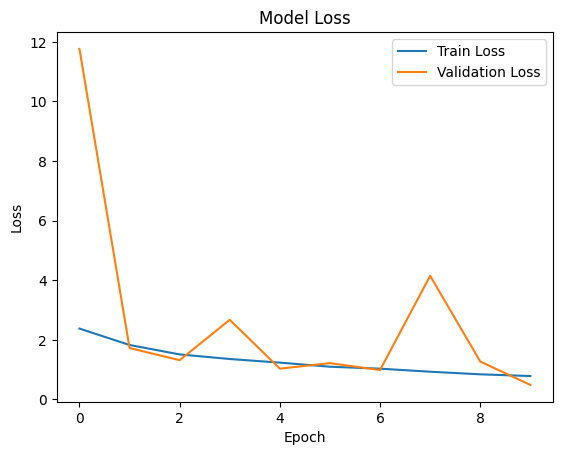

In [95]:
# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model evaluation for ResNet50

|Metrics|||||
|-|-|-|-|-|
|accuracy |    ||                      0.40   |   3188|
|macro avg |      0.28  |    0.35    |  0.28 |     3188|
|weighted avg |      0.32      |0.40  |    0.33 |     3188|

|Category|precision |   recall | f1-score |  support|
|-|-|-|-|-|
| animal fish|       0.57    |  0.80 |     0.67 |      521|
|animal fish bass   |    0.00    |  0.00|      0.00  |      13|
|fish sea_food black_sea_sprat   |    0.41  |    0.14  |    0.21 |      298|
| fish sea_food gilt_head_bream |      0.17   |   0.00  |    0.01    |   305|
|fish sea_food hourse_mackerel   |    0.27    |  0.64    |  0.38   |    286|
|fish sea_food red_mullet      | 0.48  |    0.31    |  0.37    |   291|
| fish sea_food red_sea_bream     |  0.42   |   0.47    |  0.45    |   273|
|   fish sea_food sea_bass    |   0.00   |   0.00    |  0.00    |   327|
|     fish sea_food shrimp    |   0.51   |   0.66     | 0.57    |   289|
|fish sea_food striped_red_mullet    |   0.00    |  0.00     | 0.00     |  293|
|    fish sea_food trout    |   0.28    |  0.77    |  0.41     |  292||

In [100]:
# It has a low accuracy of 40%, and it is not predicting classes like 'animal fish bass', 'fish sea_food sea_bass'.
# For other classes it is predicting but has very low metrics score.
# Also the training time was high as compared to MobileNetV2 and Custom CNN.
# We will do fine tune for this model 

## Model evaluation for ResNet50 (Fine-Tune)

|Metrics|||||||
|-|-|-|-|-|-|-|
|accuracy|         |         |         |0.09|      3188|
|macro avg|       |0.03      |0.09    |0.03|      3188|
|weighted avg|       |0.03      |0.09     |0.03|      3188|

|Category|precision|    recall|  f1-score|   support|
|-|-|-|-|-|
|animal fish|       0.00|      0.00|      0.00|       521|
|animal fish bass|       0.00 |     0.00  |    0.00   |     13|
|fish sea_food black_sea_sprat   |    0.00   |   0.00    |  0.00    |   298|
|fish sea_food gilt_head_bream|       0.00   |   0.00  |    0.00   |    305|
|fish sea_food hourse_mackerel|       0.08   |   0.89   |   0.15   |    286|
|fish sea_food red_mullet|       0.00   |   0.00   |   0.00   |    291|
|fish sea_food red_sea_bream|       0.00   |   0.00    |  0.00    |   273|
|fish sea_food sea_bass|       0.00 |     0.00  |    0.00    |   327|
|fish sea_food shrimp|       0.00   |   0.00    |  0.00     |  289|
fish sea_food striped_red_mullet|       0.00  |    0.00 |     0.00  |     293|
|fish sea_food trout|       0.30  |    0.11   |   0.16  |     292|



In [99]:
# And we see that after fine tune it got worst.
# it achieved an accuracy of 9% and which is very low.
# In fine tune, we unfreezed first 30 layers of the pre-trained model, and we did'nt got the expected results.
# Failed to predict almost each class.

### Visualizing Accuracy and Loss for ResNet50

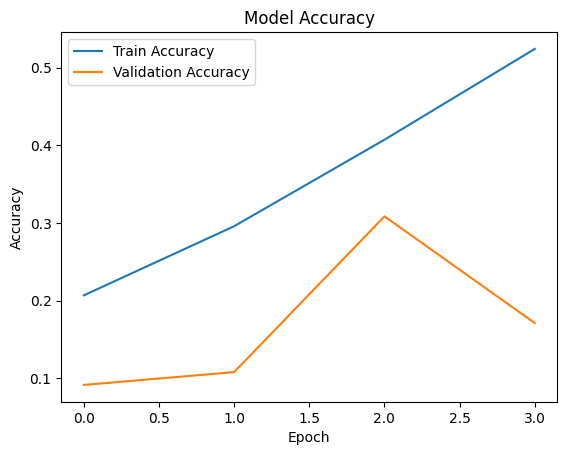

In [96]:
# Accuracy Plot
plt.plot(history_res.history['accuracy'], label='Train Accuracy')
plt.plot(history_res.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

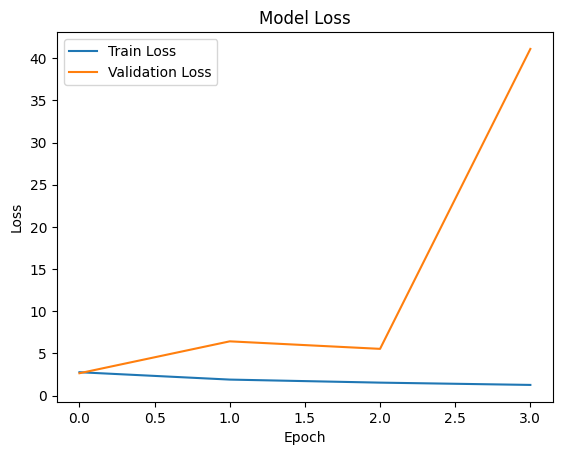

In [97]:
# Loss Plot
plt.plot(history_res.history['loss'], label='Train Loss')
plt.plot(history_res.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model evaluation for DenseNet121

|Metrics|||||
|-|-|-|-|-                        
|accuracy|           |          |      1.00|      3188|
|macro avg|       0.98|      0.98|      0.98|      3188|
|weighted avg|       1.00|      1.00|      1.00|      3188|

|Category|precision|    recall|  f1-score|   support|
|-|-|-|-|-|
|animal fish|       0.99|      0.99|      0.99|       521|
|animal fish bass|       0.77|      0.77|      0.77|        13|
|fish sea_food black_sea_sprat|       1.00|      1.00|      1.00 |      298|
|fish sea_food gilt_head_bream|       1.00   |   0.99   |   0.99  |     305|
|fish sea_food hourse_mackerel|       0.99|      1.00|      0.99|       286|
|fish sea_food red_mullet|       1.00|      1.00|      1.00|       291|
|fish sea_food red_sea_bream|       0.99|      1.00|      0.99|       273|
|fish sea_food sea_bass|       1.00|      1.00|      1.00|       327|
|fish sea_food shrimp|       1.00|      1.00|      1.00|       289
|fish sea_food striped_red_mullet|       1.00|      0.99|      1.00|       293|
|fish sea_food trout|       1.00|      1.00|      1.00|       292|

In [102]:
# This model is performing excellent with the pretrained model (DenseNet50).
# Its perfomance is getting higher accuracy,precision and recall score.
# It is predicting all the models with excellent precisions as compared our other trained model. 
# It achieved an accuracy of 100% and precision of 98%. Its overall performance is best as compared to other models.

### Visualizing Accuracy and Loss for DenseNet121

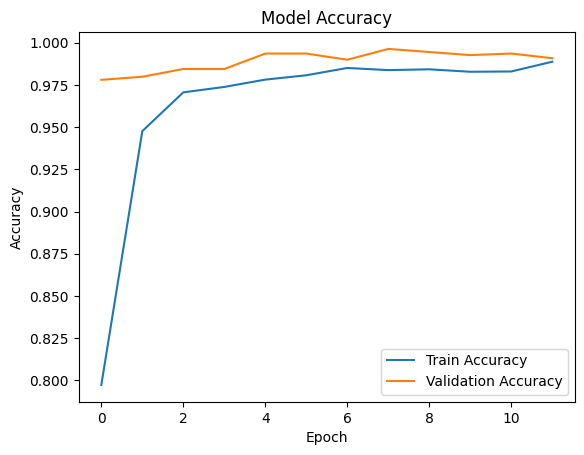

In [103]:
# Accuracy Plot
plt.plot(history_dense.history['accuracy'], label='Train Accuracy')
plt.plot(history_dense.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

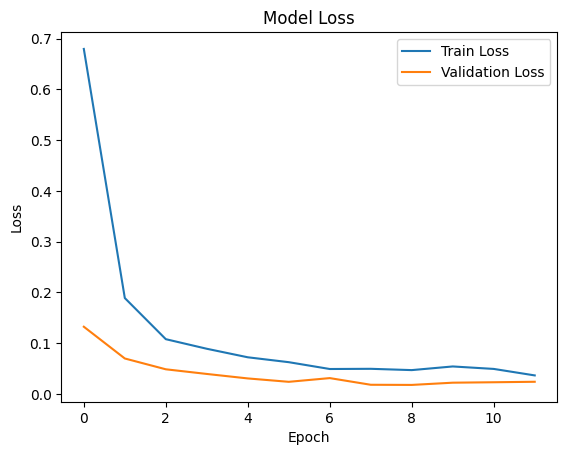

In [104]:
# Loss Plot
plt.plot(history_dense.history['loss'], label='Train Loss')
plt.plot(history_dense.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model evaluation for InceptionV3

|Metrics||||||
|-|-|-|-|-|-|
|accuracy|             |         |     1.00  |    3188|
|macro avg|       1.00 |     0.97 |     0.98 |     3188|
|weighted avg|       1.00 |     1.00|      1.00|      3188|

|Category|precision|    recall|  f1-score|   support|
|-|-|-|-|-|
|animal fish|       0.99  |    1.00 |     0.99   |    521|
|animal fish bass|       1.00  |    0.69  |    0.82 |       13|
|fish sea_food black_sea_sprat|       1.00   |   1.00 |     1.00  |     298|
|fish sea_food gilt_head_bream |      1.00 |     1.00   |   1.00    |   305|
|fish sea_food hourse_mackerel|       0.99  |    1.00   |   1.00  |     286|
|fish sea_food red_mullet |      1.00    |  0.99    |  1.00    |   291|
|fish sea_food red_sea_bream|       1.00  |    1.00    |  1.00  |     273|
|fish sea_food sea_bass |      1.00   |   1.00 |     1.00  |     327|
|fish sea_food shrimp  |     1.00   |   1.00   |   1.00   |    289|
|fish sea_food striped_red_mullet|       0.99  |    0.99  |    0.99   |    293|
|fish sea_food trout |      1.00   |   1.00   |   1.00 |      292|

In [105]:
# The performance of the model is top class, it acheived an accuracy of 100% and precision of 100%.
# Among all the model this model has better performance for all the classes.
# It also predicts classes that other models failed to predict.
# For all the classes it hit the precision of 100%. 
# Recall score and f1 score are better too (97% and 98%).

### Visualizing Accuracy and Loss for InceptionV3

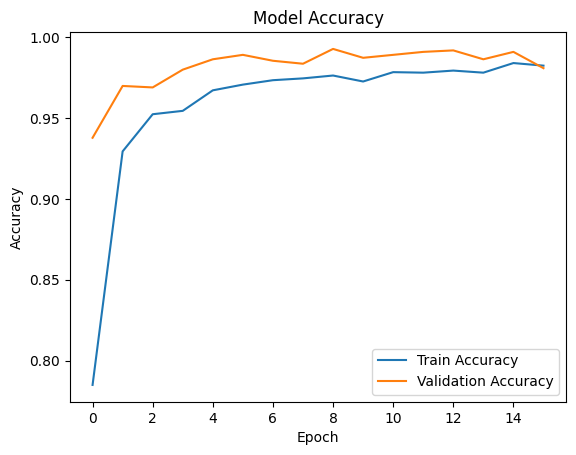

In [106]:
# Accuracy Plot
plt.plot(history_inc.history['accuracy'], label='Train Accuracy')
plt.plot(history_inc.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

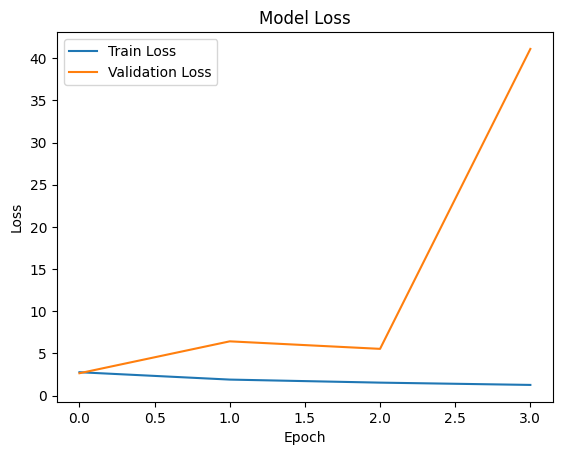

In [107]:
# Loss Plot
plt.plot(history_res.history['loss'], label='Train Loss')
plt.plot(history_res.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Comparison

## ***Custom CNN*** [vs] ***MobileNetV2*** [vs] ***VGG16*** [vs] ***ResNet50*** [vs] ***DenseNet121*** [vs] ***InceptionV3***

|Model|Accuracy|Precision|Recall Score|f1-Score|Time(labelled)|
|-|-|-|-|-|-|
|Custom CNN |0.86|0.78|0.77|0.77|Average|
|MobileNetV2 |0.99|1.00|0.95|0.97|Faster|
|VGG16 |0.97|0.98|0.89|0.90|Slower| 
|ResNet50 | 0.09|0.03|0.09|0.03|Slower|
|DenseNet121 | 1.00|0.98|0.98|0.98|Average|
|InceptionV3|1.00|1.00|0.97|0.98|Slower|

## Comparison Summary

In [1]:
# Custom CNN has very good performance, it took a little bit more time to train, achieved an accuracy of 86% and average other metrics.
# Meanwhile Using MobileNetV2 (pre-trained model) it was faster than other models and has best performance among other models. Memory usage is less.
# VGG16 has good performnace also it took a bit more time to train and memory usage is also more. Achieved an accuracy of 97%.
# ResNet50 maybe got error while loading the model, fine tuning mae it worst in my case. 
# DenseNet121 has very good performance, achieved an accuracy of 100%, for fish classification its good accuracy. 
# InceptionV3 also achieved an accuracy of 100%, memory usage is more as compared to other models, time a longer time to train. 

## Model Used for Deployment 

### ***MobileNetV2***

In [2]:
# Faster, low memory usage.  
# Predicts all the classes with good accuracy,precision,recall score,f1-score.
# Will not face larger file issue for deployment.

# Conclusion 

- In this project, I applied transfer learning to classify multiple fish species using pre-trained convolutional neural networks (CNNs) such as
   MobileNetV2, VGG16, ResNet50, EfficientNetB0, and InceptionV3. 
 - The ResNet50 model was fine-tuned and evaluated on a custom dataset with multiple, sometimes highly imbalanced, classes.
 - Transfer learning significantly reduced training time and allowed the use of deep architectures even with limited computational resources.
 - Larger input sizes (e.g., InceptionV3’s 299×299) required more memory and were more sensitive to generator configurations.
 - Saving both model weights and training history is essential for efficient experimentation and result visualization without retraining.